In [990]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(message_corrupt, message_org, test_size=0.2, random_state=42)

In [991]:
def map(value, min, max):
        return (value/np.max(value)) * (max - min)


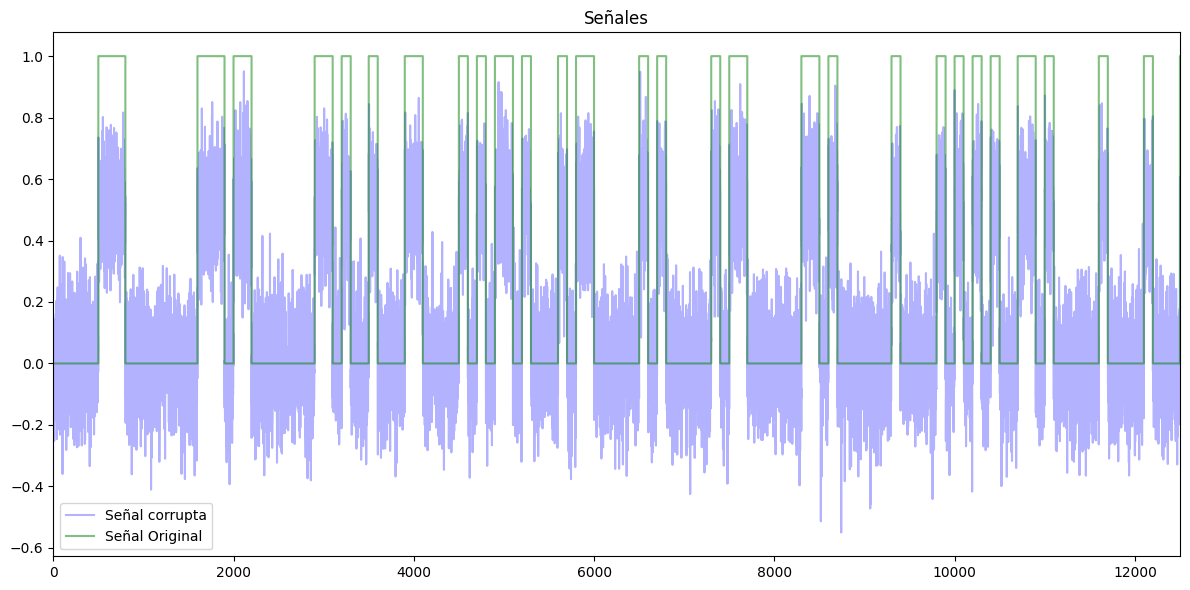

In [992]:
a1 = 1       # Valor del símbolo a1
a0 = 0    # Valor del símbolo a0
Nsamples = 100  # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.7
p_1 = 1 - p_0

amp_noise = 0.25

Nsymbols = 500 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

time = np.linspace(0, N, N)

# Genera una secuencia de símbolos basados en las probabilidades dadas
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])

# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message_org = data  # Almacena la secuencia completa en la variable 'message'

o2 = 1

noise = np.random.normal(0, o2, N)

message_corrupt  = message_org + noise*amp_noise


message_corrupt = message_corrupt.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada
message_org = message_org.reshape(-1, 1)   

message_corrupt = map(message_corrupt, 0, 1)
message_org = map(message_org, 0, 1)


plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_corrupt, '-b', label='Señal corrupta', alpha=0.3)
plt.step(time,message_org, '-g',label='Señal Original', alpha = 0.5)
#plt.step(time,y_pred_test, '-r',label='Señal Recuperada', alpha=0.3)
plt.xlim(0,int(N/4))
plt.title(f'Señales')
plt.legend()
plt.show()

In [993]:
print(message_corrupt.shape[0])

50000


In [994]:

entrada = tf.keras.layers.Dense(units=4, input_shape=[1])
capa1 = tf.keras.layers.Dense(units=50, activation='relu')
capa2 = tf.keras.layers.Dense(units=50, activation='relu')
#capa3 = tf.keras.layers.Dense(units=50, activation='relu')
salida = tf.keras.layers.Dense(units=2, activation='sigmoid')
modelo = tf.keras.Sequential([entrada, capa1, capa2, salida])

# Compilación del modelo
modelo.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy()
              
              )

historial=modelo.fit(message_corrupt, message_org, epochs=5)

# Evaluación del modelo
#loss, accuracy = modelo.evaluate(X_test, y_test)

#print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Predecir y evaluar los resultados
y_pred_test = modelo.predict(message_corrupt)




Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0738
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0553
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0551
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0550
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step


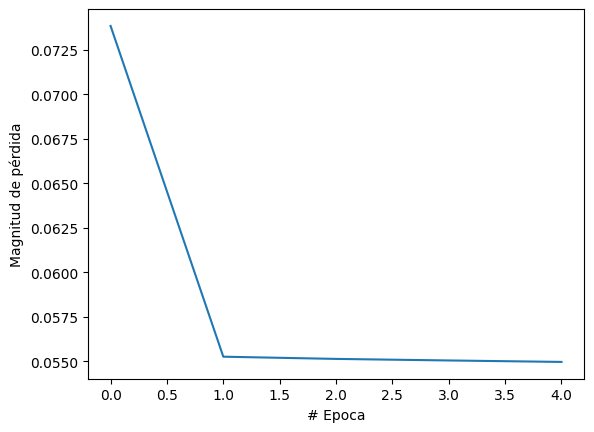

In [995]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1563/1563 [==============================] - 2s 2ms/step
0.99944365
Original: 0 - Reconstruida: [0.6865035  0.14708468]
Original: 1 - Reconstruida: [0.08818324 0.793752  ]
Original: 0 - Reconstruida: [0.961554   0.00683925]
Original: 1 - Reconstruida: [0.28440776 0.48648065]
Original: 1 - Reconstruida: [0.02242409 0.93238807]
Original: 1 - Reconstruida: [0.03045767 0.9149608 ]
Original: 0 - Reconstruida: [0.9657048  0.00565585]
Original: 1 - Reconstruida: [0.00797722 0.9675479 ]
Original: 0 - Reconstruida: [0.93640286 0.01595708]
Original: 0 - Reconstruida: [0.88574994 0.04220798]
Original: 0 - Reconstruida: [0.9767117 0.0029831]
Original: 1 - Reconstruida: [0.02194405 0.933481  ]
Original: 0 - Reconstruida: [9.8988372e-01 7.6950376e-04]
Original: 0 - Reconstruida: [0.91797054 0.02441703]
Original: 1 - Reconstruida: [0.02401858 0.9288038 ]
Original: 0 - Reconstruida: [0.9518997  0.00994429]
Original: 1 - Reconstruida: [0.00691798 0.9705918 ]
Original: 0 - Reconstruida: [0.97842026 0.00

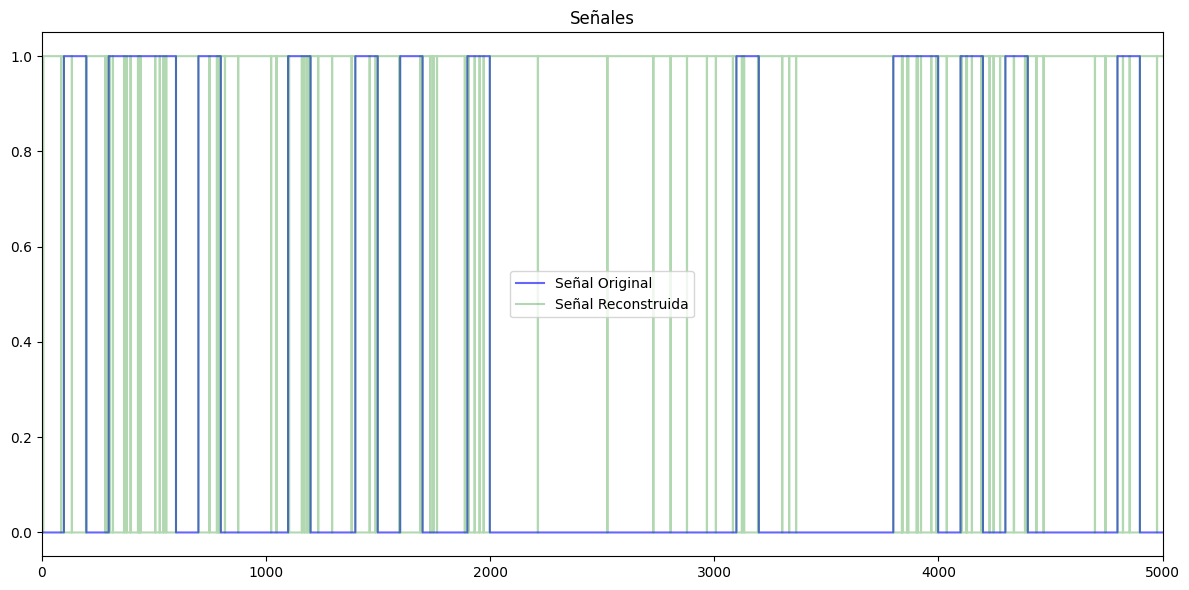

In [996]:
data_test = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
data_test = np.concatenate([[v]*Nsamples for v in data_test])


message_test = data_test
noise_test = np.random.normal(0, o2, N)
message_corrupt_test  = message_test + noise_test*amp_noise
message_corrupt_test = message_corrupt_test.reshape(-1, 1)  # Redimensionar para que cada muestra sea un vector de entrada

message_corrupt_test = map(message_corrupt_test,0,1)

message_predict = modelo.predict(message_corrupt_test)
message_predict_ = message_predict.reshape(1, -1)[0]



print(max(message_predict_))

for i in range(0,2000,100):
    print(f"Original: {message_test[i]} - Reconstruida: {message_predict[i]}")

# Predecir y aplicar umbral

values = [1,0]
message_predict = [values[np.argmax(dato)] for dato in message_predict]




#message_predict_ = (message_predict > 0.01).astype(int)
#umbral = 0.79
#print(max(message_predict_))

#message_predict = [1 if value >= umbral else 0 for value in message_predict_]
#message_predict=message_predict_

plt.figure(figsize=(12,6),tight_layout=True)  #modificar el tamaño (x,y)
plt.step(time,message_test, '-b', label='Señal Original', alpha=0.6)
plt.step(time,message_predict, '-g',label='Señal Reconstruida', alpha=0.3)
#plt.step(time,message_corrupt, alpha=0.1)
plt.xlim(0,int(N/10))
plt.title(f'Señales')
plt.legend()
plt.show()



(array([13579.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 36421.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

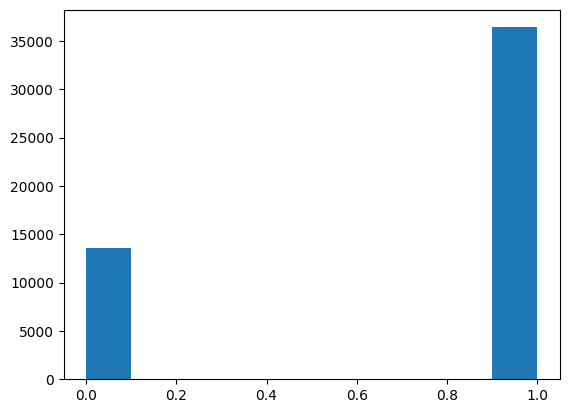

In [997]:
plt.hist(message_predict)

In [998]:
values = [0,1]

data = [[0,0.4], [0.2,0.1]]
data = np.array(data)

print([values[np.argmin(x)] for x in data])


[0, 1]
